# Ecoulement autour d'un profil NACA

![profil naca](naca1.png)

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

##  Définition d'un profil NACA

Un profil NACA est un profil d'aile standardisé défini à partir de 3 paramètres:

1. l'épaisseur relative $t$

2. la cambrure relative $y_{a}$ au point $x_{a}$ de la ligne moyenne

### profil Naca symétrique

Dans ce cas $y_{a}=x_{a}=0$ et le seul paramètre est l'épaisseur relative $t$. L'extrados est donné par la courbe $y_{e}==F(x)$ suivante et l'intrados par la courbe symétrique $y_{i}=-F(x)$

$$F(x)=5.0\,t\left(0.2969\,\sqrt{x}-0.1260\,x-0.3516\,x^{2}+0.2843\,x^{3}-0.1036\,x^{4}\right)\,\,\,\mbox{ pour }\,\,0\leq x\leq L_{c}$$

La longueur de la corde $L_{c}$ suivant x est donnée par la racine de $F(L_{c})=0$, i.e. $L_{c}=1$ (sans dimension)

Un profil NACA symétrique à 4 chiffres est donnée par la nomenclature **NACA00yz** où les 2 chiffres **yz** représente l'épaisseur relative du profil $t=yz/100$.


###  profil cambré Naca à 4 chiffres

Dans ce cas on donne la ligne moyenne du profil en fonction de $x_{a}$ et $y_{a}$. Cette ligne moyenne a pour équation en fonction de x 

$$
y_{m}=\left\{ \begin{array}{l}
\frac{y_{a}(2x_{a}-x)\,x}{x_{a}^{2}}\,\,\,\mbox{ si }\,\,\,\,0\leq x\leq x_{a}\\
\frac{y_{a}(1-x)(1+x-2x_{a})}{(1-x_{a})^{2}}\,\,\,\mbox{ si }\,\,\,\,x_{a}\leq x\leq L_{c}
\end{array}\right.
$$

L'équation de l'extrados ${y_{e},x_{e}}$ est obtenu à partir de cette ligne moyenne, en introduisant l'angle $\theta$

$$\theta(x)=\frac{dy_{m}}{dx}$$

et la fonction F(x)précédente:

$$x_{e}(x)	=	x-F(x)\,\sin(\theta(x))$$
$$y_{e}(x)	=	y_{m}+F(x)\,\cos(\theta(x))\,\,\,\,\mbox{ pour }0\leq x\leq L_{c}$$

L'équation de l'intrados ${x_{i},y_{i}}$ correspond à l'équation symétrique en y

$$x_{i}(x)	=	x+F(x)\,\sin(\theta(x))$$
$$y_{i}(x)	=	y_{m}-F(x)\,\cos(\theta(x))\,\,\,\,\mbox{ pour }0\leq x\leq L_{c}$$

La longueur de la corde $L_{c}$ vérifie $y_{e}(L_{c})=y_{i}(L_{c})$

Un profil NACA cambré à 4 chiffres est donnée par la nomenclature **NACAwxyz** où les 2 chiffres **yz** représentent l'épaisseur relative du profil ($t=yz/100$), le chiffre w la courbure relative en % ($y_{a}=w/100$) et le chiffre x la position de la flèche de la ligne moyenne en 1/10 de corde ($x_{a}=x/10$).

### profil cambré Naca à 5 chiffres

Un profil NACA cambré à 5 chiffres est donnée par la nomenclature **NACAabcyz** où les 2 derniers chiffres yz représentent l'épaisseur relative du profil (t=yz/100), et abc vaut 210,220,230,240,250 pour des cambrure simples et 211,221,231,241,251 pour des cambrures doubles. Les équations sont les mêmes sauf pour l'équation de la ligne moyenne y_{m} que l'on la trouvera sur le site Wikipédia ici : 

- [WIKIPEDIA](https://fr.wikipedia.org/wiki/Profil_NACA)

## liste des profils étudiés

In [5]:
fichier='listenaca.txt'
f = open(fichier,'r')
profils = f.readlines()
f.close()
# remove /n
profils = [p.strip() for p in profils]
print(profils)

['naca1408', 'naca1410', 'naca1412', 'naca2408', 'naca2411', 'naca2412', 'naca2415', 'naca2418', 'naca2421', 'naca2424', 'naca4412', 'naca4415', 'naca4418', 'naca4421', 'naca4424', 'naca6412', 'naca0006', 'naca0008', 'naca0009', 'naca0010', 'naca0012', 'naca0015', 'naca0018', 'naca0021', 'naca0024', 'naca25006', 'naca25008', 'naca25009', 'naca25010', 'naca25012', 'naca25015', 'naca25018', 'naca25021', 'naca25024', 'naca21006', 'naca21008', 'naca21009', 'naca21010', 'naca21012', 'naca21015', 'naca21018', 'naca21021', 'naca21024', 'naca22008', 'naca22009', 'naca22010', 'naca22012', 'naca22015', 'naca22018', 'naca22021', 'naca22024', 'naca23006', 'naca23008', 'naca23009', 'naca23010', 'naca23012', 'naca23015', 'naca23018', 'naca23021', 'naca23024', 'naca24006', 'naca24008', 'naca24009', 'naca24010', 'naca24012', 'naca24015', 'naca24018', 'naca24021', 'naca24024']


## Tracé de profils NACA

In [6]:
def traceProfil(Ep,Xa,Ya):
    def F(x):
        return 5*Ep*(0.2969*np.sqrt(x)-0.1260*x-0.3537*x**2+0.2843*x**3-0.1015*x**4)
    def Ym(x):
        if (x<Xa): 
            return Ya*(2*Xa-x)*x/Xa**2
        else :
            return Ya*(1-x)*(1+x-2*Xa)/(1-Xa)**2
    def Theta(x):
        if (x<Xa): 
            return Ya*(2*Xa-x)/Xa**2-Ya*x/Xa**2
        else :
            return Ya*(1-x)/(1-Xa)**2-Ya*(1+x-2*Xa)/(1-Xa)**2
    #
    X = np.linspace(0,1,100)
    FX= np.zeros(X.size); THETA= np.zeros(X.size); YM= np.zeros(X.size);
    for i,x in enumerate(X):
        FX[i]=F(x);
        THETA[i]=Theta(x);
        YM[i]=Ym(x);
    # nbre de points
    n=len(X);
    XX=np.zeros((2*n-1));
    YY=np.zeros((2*n-1));
    ZZ=np.zeros((2*n-1));
    XX[:n]=X  - FX*np.sin(THETA);
    YY[:n]=YM + FX*np.cos(THETA);
    XX[n::]= X[n-2::-1]  + FX[n-2::-1]*np.sin(THETA[n-2::-1])
    YY[n::]= YM[n-2::-1] - FX[n-2::-1]*np.cos(THETA[n-2::-1])
    # tracer profil et ligne moyenne
    plt.plot(XX,YY,'-')
    plt.plot(X,YM,'--')
    return


### Profil NACA wxyz

Un profil NACA cambré à 4 chiffres est donnée par la nomenclature NACAwxyz où les 2 chiffres yz représentent l'épaisseur relative du profil ($t=yz/100$), le chiffre w la courbure relative en % $y_{a}=w/100$ et le chiffre x la position de la flèche de la ligne moyenne en 1/10 de corde $x_{a}=x/10$.

$NACAy_ax_ae_p$

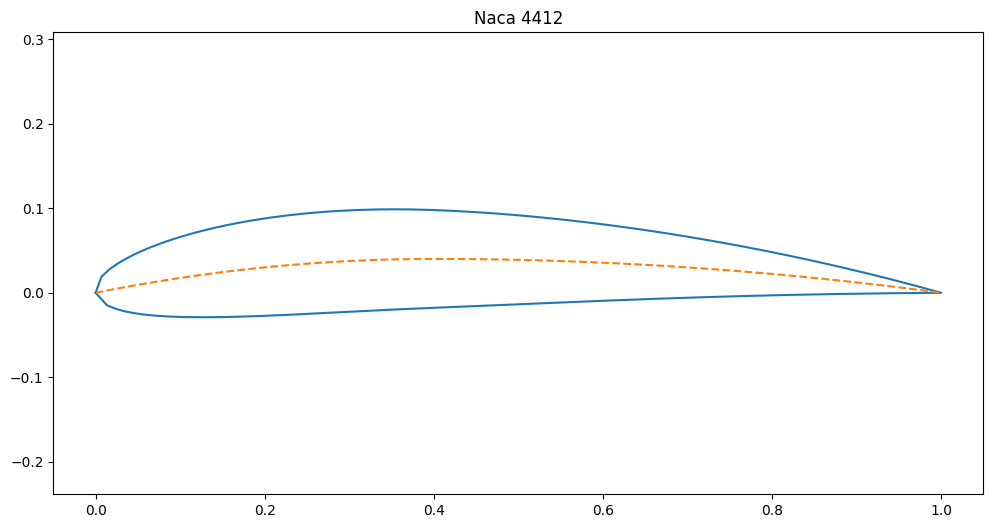

In [7]:
# profil Naca4412 (xyee)
plt.figure(figsize=(12,6))
traceProfil(12./100,4./10,4./100.)
plt.title("Naca 4412")
plt.axis('equal');

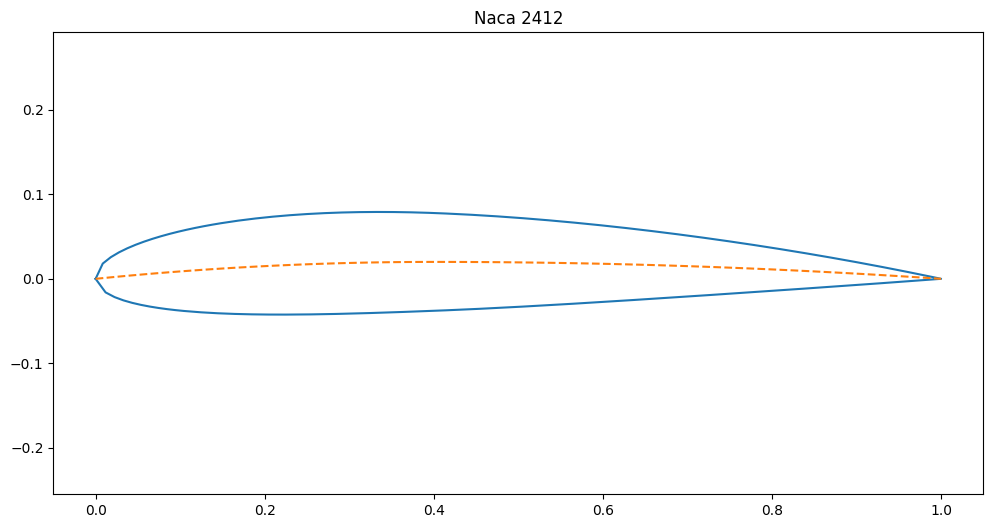

In [8]:
# profil Naca2412 (xyee)
plt.figure(figsize=(12,6))
traceProfil(12./100,4./10,2./100.)
plt.title("Naca 2412")
plt.axis('equal');

## Simulation avec XFOIL naca0012

In [9]:
from xfoil import XFoil
xf = XFoil()

In [10]:
from xfoil.test import naca0012
xf.airfoil = naca0012


 Number of input coordinate points: 160
 Counterclockwise ordering
 Max thickness =     0.120008  at x =   0.308
 Max camber    =     0.000000  at x =   0.033

  LE  x,y  =  -0.00000   0.00000  |   Chord =   1.00000
  TE  x,y  =   1.00000   0.00000  |

 Current airfoil nodes set from buffer airfoil nodes ( 160 )


In [11]:
# naca 0012 xfoil
X = xf.airfoil.coords[:,0]
Y = xf.airfoil.coords[:,1]
# data COMSOL
X1,Y1 = np.loadtxt('Naca0012.txt',unpack=True)

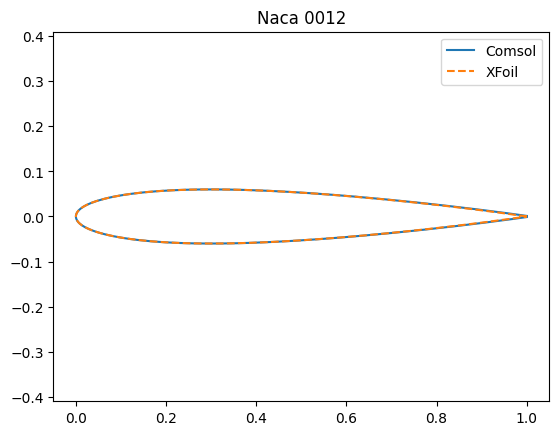

In [12]:

plt.plot(X,Y,label="Comsol")
plt.plot(X1,Y1,'--',label="XFoil")
plt.title("Naca 0012")
plt.legend()
plt.axis('equal');

## Lecture des résultats de simulation COMSOL

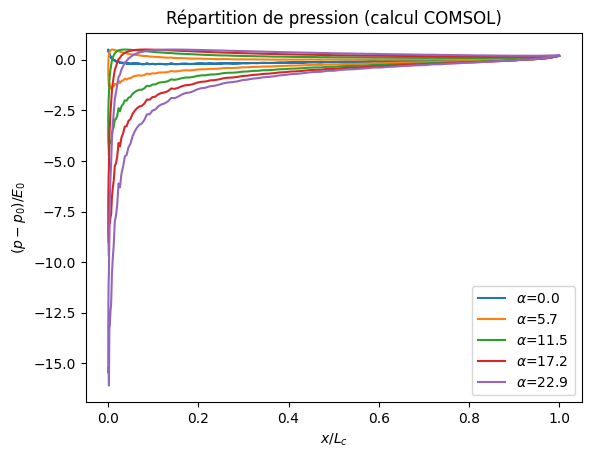

In [13]:
from sol_naca import Naca,lecture,lecture_vitesse, portance
naca12 = lecture("PressionNaca0012.dat",12,0,0)
Fp = portance(naca12)
for num in range(0,naca12.alpha.size,2):
    plt.plot(naca12.X,naca12.Pr[:,num],label="$\\alpha$={:.1f}".format(np.degrees(naca12.alpha[num])))
plt.legend()
plt.xlabel("$x/L_c$")
plt.ylabel("$(p-p_0)/E_0$")
plt.title("Répartition de pression (calcul COMSOL)");

In [14]:
# solution pour un angle donnee
num=3
alpha = naca12.alpha[num]
Alpha = np.degrees(alpha)
# Xfoil
Cl, Cd, Cm, Cp = xf.a(Alpha)
# polaire: pression adim
Xp,Pr = xf.get_cp_distribution()
Pr = Pr*0.5
print("Cp Portance à alpha={:.1f}° COMSOL={:.3f} Xfoil={:.3f}".format(Alpha,Fp[num]/0.5,Cl))

 Calculating unit vorticity distributions ...
Cp Portance à alpha=8.6° COMSOL=1.079 Xfoil=1.034


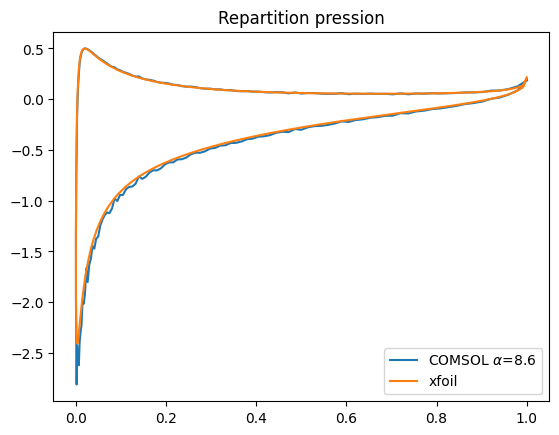

In [15]:

plt.plot(naca12.X,naca12.Pr[:,num],label="COMSOL $\\alpha$={:.1f}".format(Alpha))
plt.plot(Xp,Pr,label="xfoil")
plt.title("Repartition pression")
plt.legend();

In [16]:
Cl,Cd,Cd,Cm,Cp,alpha

(1.0344163179397583, 0.0, 0.0, -0.01183695811778307, -4.818517684936523, 0.15)

In [17]:
xref=0.25; yref=0.0
CL =  (np.trapz(naca12.Pr[:,num],naca12.X)*np.cos(alpha)   + np.trapz(naca12.Pr[:,num],naca12.Y)*np.sin(alpha))/0.5
CM = -(np.trapz(naca12.Pr[:,num]*(naca12.X-xref),naca12.X) + np.trapz(naca12.Pr[:,num]*(naca12.Y-yref),naca12.Y))/0.5
print(CM," ecart centre de poussée / 1/4 corde =",CM/CL)

-0.012608078205509748  ecart centre de poussée / 1/4 corde = -0.011688980323023337


Par définition le coefficiant de moment = moment des forces de pression / à P =  xref=0.25,yref=0.0 (i.e. 1/4 cordre)

$$ Cm = \int p\vec{n} \wedge \vec{MP} ds =  -\int p \left((x-x_{ref}) dx + (y-y_{ref}) dy\right)$$

Donc le centre de poussée = 1/4 cordre / bord d'attaque est une bonne approximation  (erreur 1/100)

## FIN